In [29]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

In [36]:
def distribution(dataset):
    
    target0 = dataset[dataset == 0]
    target1 = dataset[dataset == 1]
    
    print(f"Target 0: {len(target0)/(len(target0) + len(target1)) * 100} %")
    print(f"Target 1: {len(target1)/(len(target0) + len(target1)) * 100} %")

# Load datasets
train_data = pd.read_csv(f'../dataset_classification/TrainDataset.csv')
test_data = pd.read_csv(f'../dataset_classification/TestDataset.csv')

#Clean TR from features
x_train = train_data.drop(columns = ["label", "Unnamed: 0"])
y_train = train_data["label"]

#Split TR in TR and VL with HoldOut technique
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#Clean TS from features
x_test = test_data.drop(columns = ["label", "Unnamed: 0"])
y_test = test_data["label"]

print("Training dataset:")
distribution(y_train)

print("\nValidation dataset:")
distribution(y_val)

Training dataset:
Target 0: 13.322972591127439 %
Target 1: 86.67702740887256 %

Validation dataset:
Target 0: 13.01215032495055 %
Target 1: 86.98784967504945 %


Starting training for StackingClassifier with linear models...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Finished training.

Final evaluation

Train accuracy: 0.9298883865498728
Validation accuracy: 0.929641141565414
Test accuracy: 0.8875671520416534

Train Log-Loss: 0.2148184170676352
Val Log-Loss: 0.21262935770686509
Test Log-Loss: 0.306865996305744

Train AUC: 0.9005670293096042
Val AUC: 0.9023537556980333
Test AUC: 0.8792154303565567

Starting SHAP analysis...


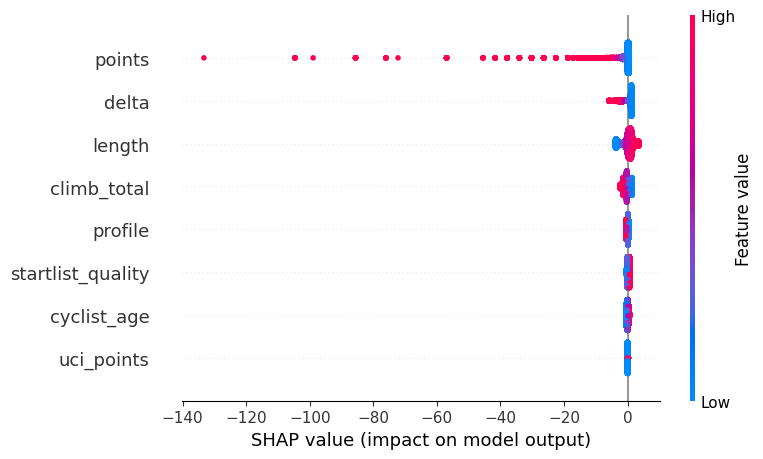

Finished SHAP analysis.


In [31]:
# Define model
clf = LogisticRegression(verbose=1, max_iter=500, random_state=42)

# Train model
print("Starting training for StackingClassifier with linear models...")
clf.fit(x_train, y_train)
print("Finished training.")

# Evaluate model
print("")
print("Final evaluation")
print("")

train_accuracy = accuracy_score(y_train, clf.predict(x_train))
val_accuracy = accuracy_score(y_val, clf.predict(x_val))
test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f"Train accuracy: {train_accuracy}")
print(f"Validation accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print("")

# Calculate log-loss
train_y_proba = clf.predict_proba(x_train)
val_y_proba = clf.predict_proba(x_val)
test_y_proba = clf.predict_proba(x_test)

train_loss = log_loss(y_train, train_y_proba)
val_loss = log_loss(y_val, val_y_proba)
test_loss = log_loss(y_test, test_y_proba)

print(f"Train Log-Loss: {train_loss}")
print(f"Val Log-Loss: {val_loss}")
print(f"Test Log-Loss: {test_loss}")
print("")

# Calculate AUC
train_auc = roc_auc_score(y_train, train_y_proba[:, 1])
val_auc = roc_auc_score(y_val, val_y_proba[:, 1])
test_auc = roc_auc_score(y_test, test_y_proba[:, 1])

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")
print("")

# SHAP Integration -------------------------------------------------------------------
print("Starting SHAP analysis...")

# Apply SHAP to model
explainer = shap.Explainer(clf, x_train)
shap_values = explainer(x_train)

# Visualize SHAP analysis to model
shap.summary_plot(shap_values, x_train)

print("Finished SHAP analysis.")